# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis

Import required Python packages.

In [45]:
%matplotlib inline

from pathlib import Path

import math
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
from statsmodels import robust
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

print("Imports Done!")

Imports Done!


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [3]:
DATA = "~/PycharmProjects/Datasets/"
mtcar_path = DATA + "mtcars.csv"
mtcar = pd.read_csv(mtcar_path)

In [4]:
mtcar.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
mtcar.shape

(32, 12)

In [6]:
mtcar.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
mtcar_df = mtcar.copy()

In [8]:
mtcar_df = mtcar_df.rename(columns={"Unnamed: 0" : "Car Model"})

In [9]:
mtcar_df["vs"] = mtcar_df["vs"].replace({0 : "V", 1 : "S"})

In [10]:
mtcar_df["am"] = mtcar_df["am"].replace({0 : "Auto", 1 : "Manual"})

In [11]:
result = mtcar_df["qsec"][(mtcar_df["cyl"] != 3) & (mtcar_df["mpg"] > 20)].mean()
result

18.81642857142857

In [12]:
mtcar_df.groupby(["vs", "am"]).agg({"hp" : "mean"})

hp
vs am                
S  Auto    102.142857
   Manual   80.571429
V  Auto    194.166667
   Manual  180.833333

In [13]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [14]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [15]:
mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

mpg       disp
am     vs                     
Auto   S   2.471071  49.130725
       V   2.774396  71.823494
Manual S   4.757701  18.802128
       V   4.008865  95.233616

In [16]:
my_stats = mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

In [17]:
descriptions_stat = mtcar_df.groupby(["am"]).agg("std").loc[:, ["hp", "disp"]]
descriptions_stat

,hp,disp
am,,
Auto,53.908196,110.171647
Manual,84.062324,87.203989


In [18]:
round(mtcar_df.groupby(["am", "vs"]).agg({"qsec" : ["count", "min", "max", "mean", "std", "sem"]}), 2)

qsec                                 
          count    min    max   mean   std   sem
am     vs                                       
Auto   S      7  18.30  22.90  19.97  1.46  0.55
       V     12  15.41  18.00  17.14  0.80  0.23
Manual S      7  16.90  19.90  18.70  0.95  0.36
       V      6  14.50  17.02  15.80  1.09  0.45

In [19]:
mtcar_df.isna().sum()

Car Model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

Dealing with NA 

In [20]:
# mtcar_df.head(15)

In [21]:
# mtcar_df["mpg"].mean()

In [22]:
# mtcar_df["mpg"].iloc[1:10] = None

In [23]:
# mtcar_df.head(15)

In [24]:
# mtcar_df["mpg"].mean()

<AxesSubplot:xlabel='mpg', ylabel='Count'>

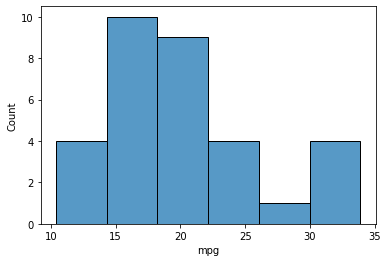

In [25]:
sns.histplot(mtcar_df["mpg"])

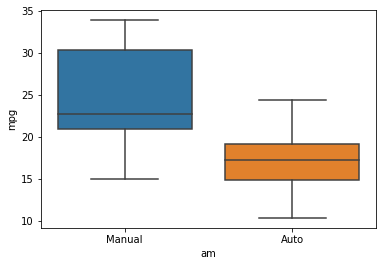

In [26]:
ax = sns.boxplot(x="am", y="mpg", data=mtcar_df)

<AxesSubplot:xlabel='mpg', ylabel='hp'>

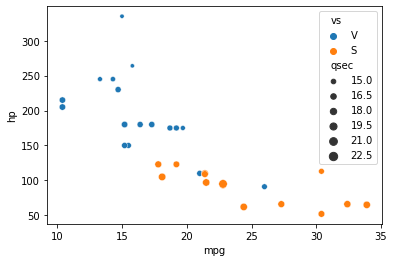

In [27]:
sns.scatterplot(data=mtcar_df, x="mpg", y="hp", hue="vs", size= "qsec")

<AxesSubplot:xlabel='mpg', ylabel='disp'>

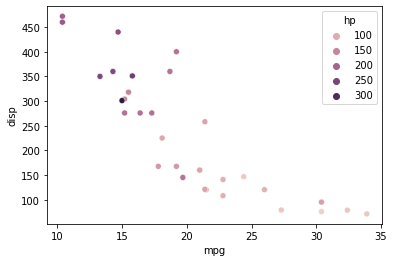

In [28]:
sns.scatterplot(data=mtcar_df, x="mpg", y="disp", hue="hp")

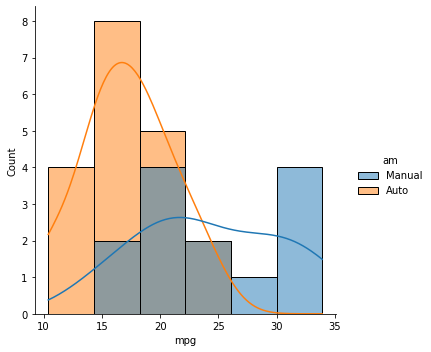

In [29]:
sns.displot(data=mtcar_df, x="mpg", hue="am", kde=True)

In [30]:
mtcar_df.head()

,Car Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V,Manual,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,S,Manual,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,S,Auto,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V,Auto,3,2


In [31]:
d = mtcar_df.groupby(["vs", "am"])["am"].count().unstack()
d

am,Auto,Manual
vs,,
S,7,7
V,12,6


In [33]:
p_value = st.fisher_exact(d)[1]
p_value

0.47269744160178034

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html#scipy.stats.kendalltau

In [47]:
st.pearsonr(mtcar_df["mpg"], mtcar_df["hp"])[0]

-0.7761683718265864

In [65]:
# Расчёт степеней свободы для переменных и доверительного интервала для коэффициента корреляции Пирсона

def stdev(X):
    m = X.mean()
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 / (len(Y) - 1))
    return(df)

def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf((1 + alpha)/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

https://stackoverflow.com/questions/33176049/how-do-you-compute-the-confidence-interval-for-pearsons-r-in-python

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom

https://stepik.org/lesson/11508/step/2?unit=2531

In [62]:
print('Degrees of freedom for Student-t distribution: ' + str(degreesOfFreedom(mtcar_df["mpg"], mtcar_df["hp"])))

Degrees of freedom for Student-t distribution: 31.479052044115537


In [61]:
r_confidence_interval(st.pearsonr(mtcar_df["mpg"], mtcar_df["hp"])[0], .95, 31.479)

(-0.8859833417042168, -0.5839195529962159)

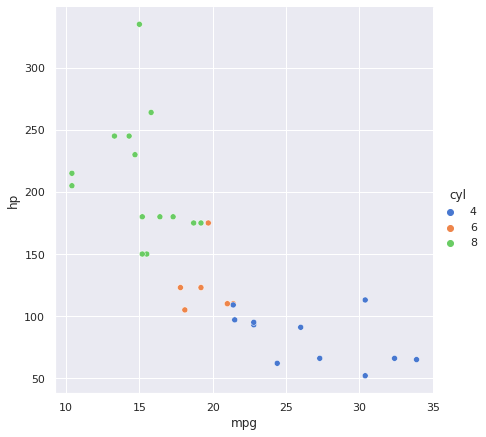

In [71]:
sns.set_theme(style="darkgrid")
sns.relplot(x="mpg", y="hp", hue="cyl", palette="muted", height=6, data=mtcar_df)

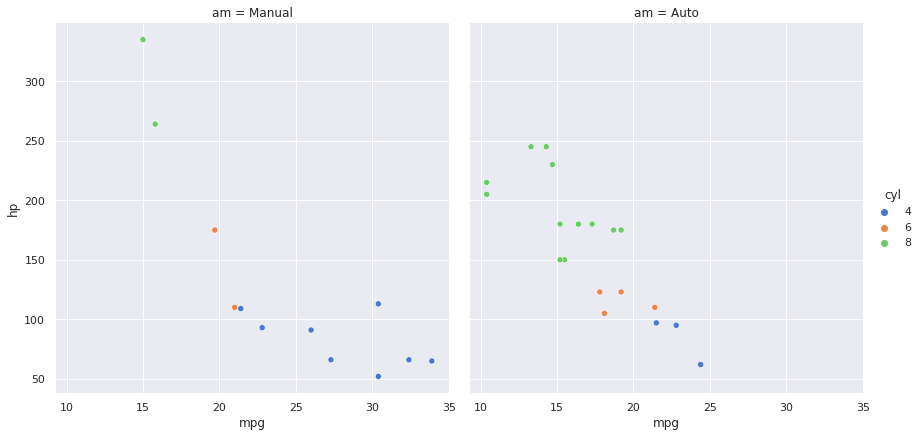

In [73]:
sns.set_theme(style="darkgrid")
sns.relplot(x="mpg", y="hp", hue="cyl", palette="muted", col="am", height=6, data=mtcar_df)

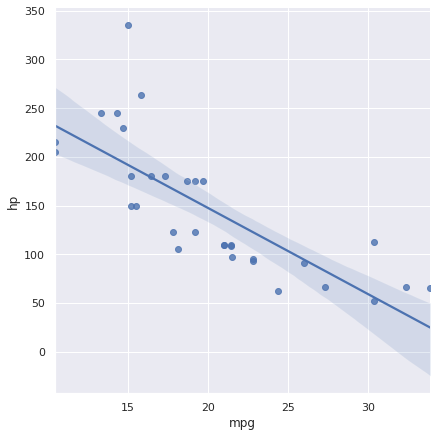

In [78]:
sns.lmplot(x="mpg", y="hp", palette="muted", height=6, data=mtcar_df)

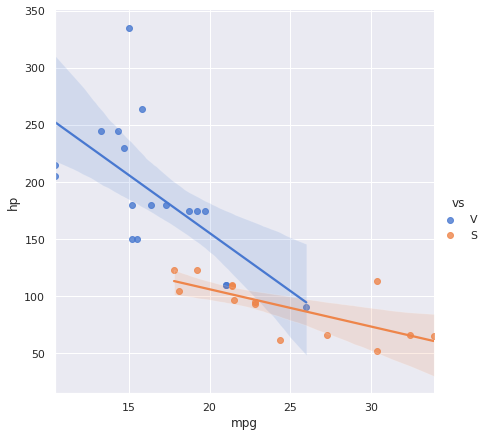

In [85]:
sns.lmplot(x="mpg", y="hp", palette="muted", hue="vs", height=6, data=mtcar_df)

In [74]:
mtcar_df.head()

,Car Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V,Manual,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,S,Manual,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,S,Auto,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V,Auto,3,2


array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='disp', ylabel='mpg'>,
        <AxesSubplot:xlabel='hp', ylabel='mpg'>,
        <AxesSubplot:xlabel='drat', ylabel='mpg'>,
        <AxesSubplot:xlabel='wt', ylabel='mpg'>,
        <AxesSubplot:xlabel='qsec', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='disp'>,
        <AxesSubplot:xlabel='disp', ylabel='disp'>,
        <AxesSubplot:xlabel='hp', ylabel='disp'>,
        <AxesSubplot:xlabel='drat', ylabel='disp'>,
        <AxesSubplot:xlabel='wt', ylabel='disp'>,
        <AxesSubplot:xlabel='qsec', ylabel='disp'>],
       [<AxesSubplot:xlabel='mpg', ylabel='hp'>,
        <AxesSubplot:xlabel='disp', ylabel='hp'>,
        <AxesSubplot:xlabel='hp', ylabel='hp'>,
        <AxesSubplot:xlabel='drat', ylabel='hp'>,
        <AxesSubplot:xlabel='wt', ylabel='hp'>,
        <AxesSubplot:xlabel='qsec', ylabel='hp'>],
       [<AxesSubplot:xlabel='mpg', ylabel='drat'>,
        <AxesSubplot:xlabel='disp', ylabel=

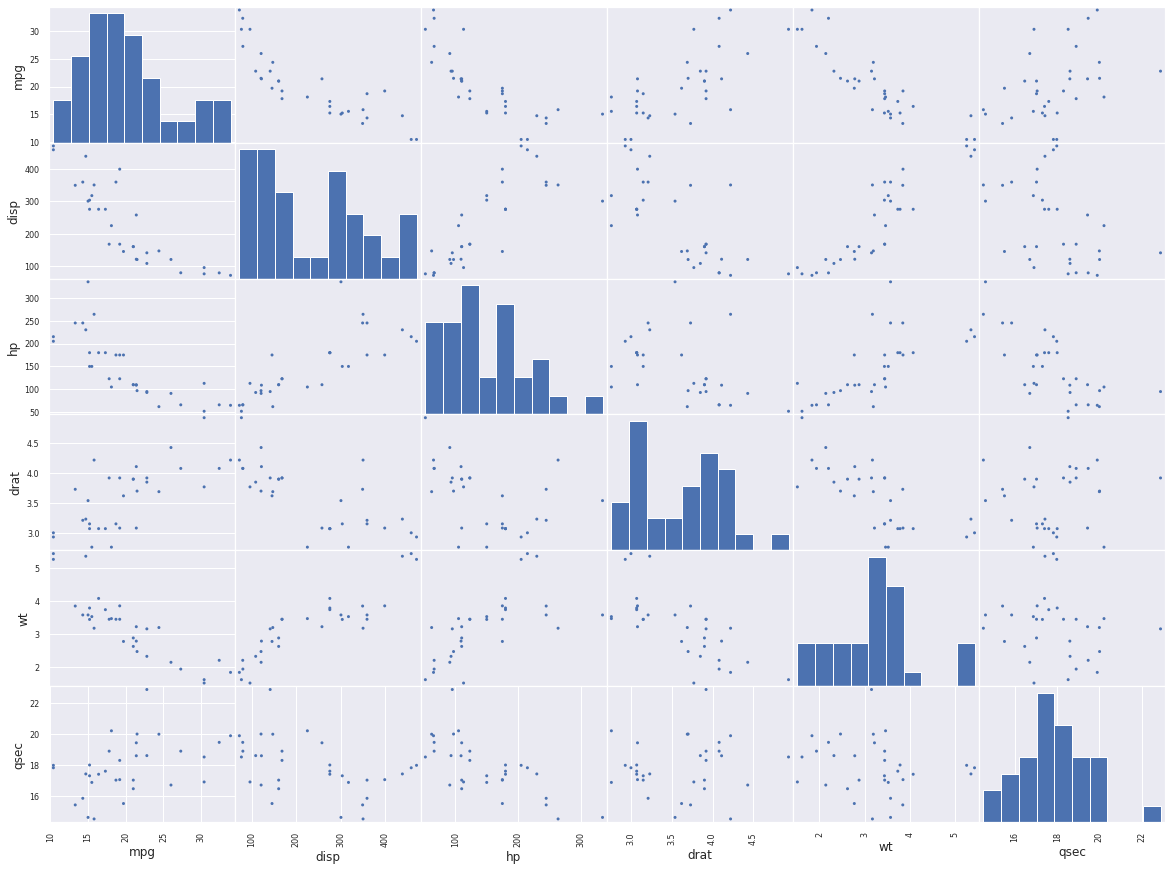

In [101]:
pd.plotting.scatter_matrix(mtcar_df[["mpg", "disp", "hp", "drat", "wt", "qsec"]], alpha=1, figsize=(20,15))

In [129]:
# https://stepik.org/lesson/11508/step/5?unit=2531
# import pandas as pd
# import scipy.stats as st

# def corr_comp(data_frame: pd.DataFrame) -> tuple:
#     """Computing Pearson correlation coefficient and p-value for testing non-correlation.
#     """
#     return st.pearsonr(data_frame.iloc[:, 0], data_frame.iloc[:, 1])

# test_df = mtcar_df.iloc[:, [1,5]]
# corr_comp(test_df)

### NEW DATASET

In [2]:
nucleotides = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data.csv")
nucleotides.head()

,V1,V2,V3
0,C,A,C
1,G,G,A
2,C,C,C
3,T,T,A
4,G,T,A


In [3]:
nucleotides.describe()

,V1,V2,V3
count,30,30,30
unique,4,4,4
top,G,G,A
freq,10,10,11


In [4]:
v1_vc = nucleotides["V1"].value_counts()
v2_vc = nucleotides["V2"].value_counts()
v3_vc = nucleotides["V3"].value_counts()
[v1_vc, v2_vc, v3_vc]

[G    10
 T     7
 C     7
 A     6
 Name: V1, dtype: int64,
 G    10
 C     9
 A     6
 T     5
 Name: V2, dtype: int64,
 A    11
 T     9
 G     6
 C     4
 Name: V3, dtype: int64]

In [12]:
st.chisquare(v1_vc)

Power_divergenceResult(statistic=1.2, pvalue=0.753004311656458)

In [ ]:
# import pandas as pd
# import scipy.stats as st

# def smart_test(x: pd.DataFrame) -> list: 
#     """ Performing a Fisher exact test on input contingency table 
#         if at least one cell contains less than 5 observations. 
#         Else performing a one-way Chi-square test.
    
#     Parameters
#     ----------
#     x: pd.DataFrame
#         Input pd.DataFrame with some numeric data.
    
#     Returns
#     -------
#         Returns p-value if performing a Fisher exact test. 
#         If performing a one-way chi-square test returns:
#         chi-square test statistic, p-value of the test and degrees of freedom.
#     """

#     return st.fisher_exact(x)[1] if (x < 5).any().any() else [*st.chi2_contingency(x)[0:3]]

# # Примеры датафреймов для проведения тестов:
# df_1 = pd.DataFrame([[12, 7], [6, 7]])
# df_2 = pd.DataFrame([[8, 6], [2, 4]])

# # Пример запуска функции с тестовым датафреймом:
# smart_test(df_1)

In [ ]:
# pd.pivot_table(data=df_1, columns=df_1.columns)

In [ ]:
# Пытки-попытки!
# df_3 = pd.DataFrame([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 
#                      [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]]).T

# # df_3
# pd.pivot_table(data=df_3, values=df_3.columns)

In [ ]:
# # Примеры датафреймов для проведения тестов:
# df_1 = pd.DataFrame([[12, 7], [6, 7]])
# df_2 = pd.DataFrame([[8, 6], [2, 4]])

# # Пример запуска функции с тестовым датафреймом:
# smart_test(df_1)

In [ ]:
# help(smart_test)

In [ ]:
# Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# mtcar_path = PATH_TO_DATA + "mtcars.csv"
# mtcar = pd.read_csv(mtcar_path)
# d = mtcar.groupby(["vs", "am"])["am"].count().unstack()
# p_value = scipy.stats.fisher_exact(d)[1]

### NEW DATASET 

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
airquality_path = DATA + "airquality.csv"
airquality = pd.read_csv(airquality_path)

In [ ]:
airquality = airquality.drop("Unnamed: 0", axis=1)

In [ ]:
airquality.head(10)

In [ ]:
airquality_df = airquality.copy()

In [ ]:
airquality_df.loc[airquality_df.Month >= 7]
# ИЛИ
airquality_df.query("Month >= 7")

In [ ]:
aq_ss = airquality_df.query("Month >= 7")

In [ ]:
aq_ss.groupby("Month").agg({"Ozone" : "count"})
# ИЛИ 
# airquality_df.query("Month >= 7").groupby("Month").agg({"Ozone" : "count"})

In [ ]:
sns.boxplot(x="Month", y="Ozone", data=airquality_df)

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
iris_path = DATA + "iris.csv"
iris = pd.read_csv(iris_path, index_col=0)

In [ ]:
iris.head(10)

In [ ]:
iris.describe()

In [ ]:
iris.agg("std")

In [ ]:
iris[iris.Species == "virginica"].median().sort_values(ascending=False)

In [ ]:
sns.displot(data=iris, x="Sepal.Length", hue="Species", multiple="stack")

In [ ]:
iris_df = iris[iris.Species != "setosa"]

In [ ]:
sns.histplot(iris_df, x="Sepal.Length", kde=True, hue="Species")

In [ ]:
g = sns.FacetGrid(iris_df, col="Species")
g.map(sns.histplot, "Sepal.Length", kde=True, bins=5)
g.add_legend()

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid - IMBA

In [ ]:
sns.histplot(iris_df, x="Sepal.Length", hue="Species", element="poly") 

In [ ]:
sns.displot(iris_df, x="Sepal.Length", hue="Species", kind="kde")

In [ ]:
sns.kdeplot(data=iris_df, x="Sepal.Length", hue="Species", fill=True, common_norm=False, alpha=.5, linewidth=1)

In [ ]:
sns.set_theme(style="darkgrid")
sns.boxplot(y="Sepal.Length", x="Species", data=iris_df)

In [ ]:
# Perform the Shapiro-Wilk test for normality.
shapiro_test = stats.shapiro(iris_df["Sepal.Length"])
shapiro_test

In [ ]:
shapiro_test_1 = stats.shapiro(iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
shapiro_test_2 = stats.shapiro(iris_df[iris_df.Species == "virginica"]["Sepal.Length"])
[shapiro_test_1, shapiro_test_2]

In [ ]:
# Perform Bartlett’s test for equal variances.
# Гомогенность дисперсии проверяем, короче.
stat, p = st.bartlett(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

In [ ]:
# Calculate the T-test for the means of two independent samples of scores.
t_test = st.ttest_ind(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                               iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]) #, equal_var=True
t_test

In [ ]:
# Проверяем гипотезу о том, что среднее значение длины чашелистика в генеральной совокупности (датасете) равно 8.
# Для этого используем одновыборочный Т-тест. 
t_test = st.ttest_1samp(iris_df["Sepal.Length"], 8) 
t_test

Как и следовало ожидать - нет, среднее значение "Sepal.Length" не равно 8.

In [ ]:
import numpy as np
import scipy.stats

# Самописная фукнция с просторов интернета, которая вычисляет доверительный интервал. Полезно!
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
mean_confidence_interval(iris_df["Sepal.Length"])

In [ ]:
# Расчёт доверительных интервалов
import numpy as np, scipy.stats as st

a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]

print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)),
      st.t.interval(0.95, len(b)-1, loc=np.mean(b), scale=st.sem(b)))
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html?highlight=scipy%20stats%20t#scipy.stats.t

In [ ]:
print(mean_confidence_interval(a),
      mean_confidence_interval(b))

Вывод - самописная функция повторяет метод .interval из библиотеки scipy.

Отлично!

In [ ]:
print(a.quantile([0.05, 0.95]), "\n\n",
      b.quantile([0.05, 0.95]))
print("\n\n")
print(iris_df["Sepal.Length"].quantile([0.05, 0.95]))

Итого - метод квантиль какой-то странный. Что-то тут не так, очевидно. Лучше его не использовать. 

Надо бы разобраться, почему такая разница.

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

stats.probplot(iris_df["Sepal.Length"], plot=ax)

plt.tight_layout()
plt.show()

In [ ]:
# Парный Т-тест
pt_test = scipy.stats.ttest_rel(iris_df["Sepal.Length"], iris_df["Sepal.Width"])
pt_test

Для визуализации "планок погрешностей" можно использовать:

- matplotlib, а именно matplotlib.pyplot.errorbar: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html

- seaborn.pointplot: https://seaborn.pydata.org/generated/seaborn.pointplot.html

In [ ]:
iris_df.Species.unique()

In [ ]:
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
a

In [ ]:
# Хехе, получилось!
a_origin = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"]
a = iris_df[iris_df.Species == "versicolor"]["Sepal.Length"].mean()
b_origin = iris_df[iris_df.Species == "virginica"]["Sepal.Length"]
b = iris_df[iris_df.Species == "virginica"]["Sepal.Length"].mean()

plt.errorbar(x=iris_df.Species.unique(), y=[a, b], 
             yerr=[a-st.t.interval(0.95, len(a_origin)-1, loc=np.mean(a_origin), scale=st.sem(a_origin)), 
                  b-st.t.interval(0.95, len(b_origin)-1, loc=np.mean(b_origin), scale=st.sem(b_origin))],
             data=iris_df, fmt="o", markersize=8, capsize=10) # fmt="-o", "--o", ".k"

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="Species", y="Sepal.Length", data=iris_df, join=False, capsize=.1)

In [ ]:
# Непараметрический тест на нормальность (Манна-Уитни), в англоязычной литературе - Уилкоксона
wtest = scipy.stats.wilcoxon(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                            iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(wtest)
mw_test = scipy.stats.mannwhitneyu(iris_df[iris_df.Species == "virginica"]["Sepal.Length"], 
                                   iris_df[iris_df.Species == "versicolor"]["Sepal.Length"])
print(mw_test)
# Получается, что реализации этих тестов различаются в R и Python. Подробности по ссылке:
# https://stackoverflow.com/questions/33579785/difference-between-wilcoxon-test-in-r-and-python
# Вывод - Можно использовать и Python, но если p-value различаются, то лучше полагаться на R.
# Однако, немаловажно отметить, что тест Бартлетта и Т-тест совпадают. 

In [ ]:
model_iris = smf.ols('iris["Sepal.Width"] ~ Species', data=iris).fit()
model_iris.summary() if str(input()) == "1" else print(model_iris.summary())

In [ ]:
aov_table_iris = sm.stats.anova_lm(model_iris)
aov_table_iris

In [ ]:
tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris["Sepal.Width"], groups=iris["Species"])
print(tukey_test_result_iris)

In [ ]:
# import seaborn as sns
# import statsmodels.api as sm

# iris = sns.load_dataset("iris")
# tukey_test_result_iris = sm.stats.multicomp.pairwise_tukeyhsd(endog=iris.sepal_width, groups=iris.species)
# print(tukey_test_result_iris)

In [ ]:
# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15 (1).txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# df.head()

In [ ]:
# stat, p = scipy.stats.bartlett(df[df.V2 == 1]["V1"], 
#                                df[df.V2 == 2]["V1"])
# print("The test statistic is {}. \nThe p-value of the test is {}.".format(stat, p))

In [ ]:
# wtest = scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], 
#                              df[df.V2 == 2]["V1"], mode='approx')
# wtest

In [ ]:
# scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_15.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print(scipy.stats.wilcoxon(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1]) if (scipy.stats.bartlett(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1] < 0.05) else print(scipy.stats.ttest_ind(df[df.V2 == 1]["V1"], df[df.V2 == 2]["V1"])[1])

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# DATA =  "~/Downloads/"
# path = DATA + "dataset_11504_16.txt"
# df = pd.read_csv(path, sep=" ", header=None)
# df.columns = ["V1", "V2"]
# print("{} {} {}".format(df.V1.mean(),df.V2.mean(),scipy.stats.ttest_ind(df.V1, df.V2)[1])) if (scipy.stats.ttest_ind(df.V1, df.V2)[1] < 0.05) else print("The difference is not significant")

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
tooth_path = DATA + "ToothGrowth.csv"
toothgrowth = pd.read_csv(tooth_path, index_col=0)

In [ ]:
toothgrowth.head(10)

In [ ]:
toothgrowth.shape

In [ ]:
toothgrowth.describe()

In [ ]:
subset_oj = toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)]
subset_vc = toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)]

In [ ]:
t_test = st.ttest_ind(subset_oj.len, subset_vc.len) 
t_test.statistic

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="dose", y="len", hue="supp", data=toothgrowth, join=True, capsize=.1, dodge=True)

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# t_test = scipy.stats.ttest_ind(toothgrowth[(toothgrowth.supp == "OJ") & (toothgrowth.dose == 0.5)].len, 
#                                toothgrowth[(toothgrowth.supp == "VC") & (toothgrowth.dose == 2.0)].len) 
# print(t_test.statistic)

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import seaborn as sns
# tooth_path = PATH_TO_DATA + "ToothGrowth.csv"
# toothgrowth = pd.read_csv(tooth_path, index_col=0)
# sns.set_theme(style="darkgrid")
# ax = sns.pointplot(x="dose", y="len", hue="supp", data=toothgrowth, join=True, capsize=.1, dodge=True)

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
lec_path = DATA + "lekarstva.csv"
lekarstva = pd.read_csv(lec_path, index_col=0)

In [ ]:
print(lekarstva.shape)
lekarstva.head()

In [ ]:
lekarstva.describe()

In [ ]:
lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_after, lekarstva.Pressure_before) 
lec_pair_t_test.statistic

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats

# lec_path = PATH_TO_DATA + "lekarstva.csv"
# lekarstva = pd.read_csv(lec_path, index_col=0)
# lec_pair_t_test = scipy.stats.ttest_rel(lekarstva.Pressure_before, lekarstva.Pressure_after) 
# print(lec_pair_t_test.statistic)

## NEW CHAPTER AND NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
grants_path = DATA + "grants.csv"
grants = pd.read_csv(grants_path)

In [ ]:
grants.head()

In [ ]:
grants.shape

In [ ]:
grants.isna().sum()

In [ ]:
grants.describe()

In [ ]:
grants_df = grants.copy()

In [ ]:
grants_df["status"] = grants_df["status"].replace({0 : "Not funded", 1 : "Funded"})

In [ ]:
grants_df["status"].unique()

In [ ]:
grants_df.head(3)

In [ ]:
table_1 = pd.pivot_table(grants_df, index="status", values="field", aggfunc="count")
table_1

In [ ]:
table_2 = pd.pivot_table(grants_df, index=["field"], columns=["status"], aggfunc="count")
table_2

In [ ]:
# Неудачные попытки
# -----------------------------
# grants_df.groupby(["field", "status"]).agg({"status" : "count"}).unstack()
# -----------------------------
# table_2 = grants_df.pivot_table(index="status", columns=["field"], aggfunc="count")
# table_2

In [ ]:
dist = grants_df.groupby(["field", "status"])["status"].count().unstack()
dist

In [ ]:
# Binom test
p_value_1 = scipy.stats.binom_test(table_1)
p_value_1

In [ ]:
# ChiSquare test
cs_res_1 = scipy.stats.chisquare(table_1)
print(cs_res_1)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_1[0], cs_res_1[1]))

In [ ]:
cs_res_2 = scipy.stats.chisquare(dist.T)
cs_res_2

### New Dataset

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path)

In [ ]:
hec = hec.drop("Unnamed: 0", axis=1)

In [ ]:
hec.head()

In [ ]:
hec_fem = hec[hec.Sex == "Female"]
hec_fem

In [ ]:
# Неудачные попытки
# sns.histplot(data=hec_fem, x="Hair", y="Freq")

In [ ]:
sns.catplot(data=hec_fem, x="Hair", y="Freq", hue="Eye", kind="bar")

In [ ]:
# Как сделать хорошо и правильно? - Посмотри туториалы.
# titanic = sns.load_dataset("titanic")
# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

In [ ]:
hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]]

In [ ]:
brown_haired_ladies = hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]].set_index("Eye")
brown_haired_ladies

In [ ]:
cs_res_3 = scipy.stats.chisquare(brown_haired_ladies)
print(cs_res_3)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_3[0], cs_res_3[1]))

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path, index_col=0)
brown_haired_ladies = hec.query("Sex == 'Female' and Hair == 'Brown'").iloc[:,[1, 3]].set_index("Eye")
chisquare_result = scipy.stats.chisquare(brown_haired_ladies)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(chisquare_result[0], chisquare_result[1]))

### New Dataset

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

In [ ]:
diamonds = diamonds.sort_values(by=['color', 'cut'])

In [ ]:
sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.8)

In [ ]:
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = diamonds.sort_values(by=['color', 'cut'])
# sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.7)

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color']).agg({"color" : "count"}).unstack()
d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
print(d.shape)
d

In [ ]:
# НЕПРАВИЛЬНО!

# chisquare_result = scipy.stats.chisquare(d, axis=None)
# chisquare_result
# -------------------------------------------------------------
# ПРАВИЛЬНО!
chisquare_result = st.chi2_contingency(d)
chisquare_result

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result

In [ ]:
# table_diamonds = pd.pivot_table(diamonds, index=["cut"], columns=["color"], aggfunc="count")
# table_diamonds

In [ ]:
diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)

In [ ]:
d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
d

In [ ]:
chisquare_result = st.chi2_contingency(d)
chisquare_result[0]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import numpy as np
# import scipy.stats
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = pd.DataFrame(diamonds)
# diamonds["factor_price"] = np.where(diamonds['price'] >= diamonds.price.mean(), 1, 0)
# diamonds["factor_carat"] = np.where(diamonds['carat'] >= diamonds.carat.mean(), 1, 0)
# d = diamonds.groupby(['factor_carat', 'factor_price'])['factor_price'].count().unstack()
# chisquare_result = scipy.stats.chi2_contingency(d)
# chisquare_result[0]

### Game: Megafon and N+1
#### https://nplus1.ru/material/2020/10/27/megafon

In [ ]:
import re

In [ ]:
PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"
game_df_1 = pd.read_csv(PATH_TO_DATA + "first.csv", sep=";", header=None)
game_df_1.head(10)

In [ ]:
game_df_1.columns = ["transaction_id", "company_name", "transaction_amount", "comment"]
game_df_1

In [ ]:
type(game_df_1.iloc[:,1])

In [ ]:
game_df_1[game_df_1.iloc[:,1].str.contains(r'([a-z|0-9]{8})(-[a-z|0-9]{4}){3}(-[a-z|0-9]{12})', regex=True)]

In [ ]:
# PATH_TO_DATA = "~/Downloads/Megafon_and_Nplus1_Game/"

game_df_2 = pd.read_csv(PATH_TO_DATA + "dva.csv", sep=";", verbose=True)
game_df_2.head(10)

# NEW CHAPTER
# ANOVA

Он же - дисперсионный анализ: однофакторный и многофакторный.

In [ ]:
import sys

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops = pd.read_csv(shops_path, index_col=0)
shops.head()

In [ ]:
shops.index.unique()

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="origin", y="price", data=shops, kind="box")

In [ ]:
model = smf.ols('price ~ origin', data=shops).fit()
model.summary() if str(input()) == "1" else print(model.summary())

In [ ]:
aov_table = sm.stats.anova_lm(model)
aov_table

In [ ]:
model_2 = smf.ols('price ~ origin + store', data=shops).fit()
model_2.summary() if str(input()) == "1" else print(model_2.summary())

In [ ]:
aov_table_2 = sm.stats.anova_lm(model_2)
aov_table_2

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="store", y="price", hue="origin", data=shops, join=True, capsize=.1, dodge=True)

In [ ]:
model_3 = smf.ols('price ~ origin + store + origin:store', data=shops).fit() # same result: 'price ~ origin * store' 
model_3.summary() if str(input()) == "1" else print(model_3.summary())

In [ ]:
aov_table_3 = sm.stats.anova_lm(model_3)
aov_table_3

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x=shops.index, y="price", data=shops, kind="box")

In [ ]:
model_4 = smf.ols('price ~ shops.index', data=shops).fit() 
model_4.summary() if str(input()) == "1" else print(model_4.summary())

In [ ]:
aov_table_4 = sm.stats.anova_lm(model_4)
aov_table_4

In [ ]:
# Не работает. По причине того, что индекс имеет текстовый формат. Пришлось перезагружать датасет с другим индексом.
# tukey_test_result = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops.index.unique(), groups="price")

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
shops_path = DATA + "shops.csv"
shops_2 = pd.read_csv(shops_path)
shops_2.head()

In [ ]:
tukey_test_result_shops = sm.stats.multicomp.pairwise_tukeyhsd(endog=shops_2["price"], groups=shops_2["food"])
print(tukey_test_result_shops)

In [ ]:
# tukey_test_result_shops

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
npk_path = DATA + "npk.csv"
npk = pd.read_csv(npk_path, index_col=0)
npk = npk.rename(columns={"yield" : "growth"})
npk.head()

In [ ]:
model_npk = smf.ols('growth ~ N * P', data=npk).fit()
model_npk.summary() if str(input()) == "1" else print(model_npk.summary())

In [ ]:
aov_table_npk = sm.stats.anova_lm(model_npk)
aov_table_npk.unstack()["PR(>F)"]["N:P"]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"}) # Пришлось переименовать столбец, иначе функция из библиотеки statsmodels.formula.api "спотыкается" о формулу
# model_npk = smf.ols('growth ~ N * P', data=npk).fit()
# aov_table_npk = sm.stats.anova_lm(model_npk)
# aov_table_npk.unstack()["PR(>F)"]["N:P"]

In [ ]:
model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
model_npk_2.summary() if str(input()) == "1" else print(model_npk_2.summary())

In [ ]:
aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
aov_table_npk_2.unstack()["PR(>F)"]

In [ ]:
# # Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# DATA = "~/PycharmProjects/Datasets/"
# npk_path = DATA + "npk.csv"
# npk = pd.read_csv(npk_path, index_col=0)
# npk = npk.rename(columns={"yield" : "growth"})
# model_npk_2 = smf.ols('growth ~ N + P + K', data=npk).fit()
# aov_table_npk_2 = sm.stats.anova_lm(model_npk_2)
# aov_table_npk_2.unstack()["PR(>F)"]

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
therapy_path = DATA + "therapy_data.csv"
therapy = pd.read_csv(therapy_path)
therapy.head()

In [ ]:
model_therapy = smf.ols('well_being ~ therapy', data=therapy).fit()
model_therapy.summary() if str(input()) == "1" else print(model_therapy.summary())

In [ ]:
aov_table_therapy = sm.stats.anova_lm(model_therapy)
aov_table_therapy

#### Оказывается, что на данный момент в statsmodels не реализована ANOVA с повторными наблюдениями! 

https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM

Точнее класс-то есть, а реализации нет. Обидно до слёз! (нет)

Придётся использовать что-то другое, либо извращаться с имеющимися формулами.

In [ ]:
# Не тот тип взаимодействия
model_therapy_2 = smf.ols('well_being ~ therapy + subject:therapy', data=therapy).fit() 
model_therapy_2.summary() if str(input()) == "1" else print(model_therapy_2.summary())

Вариант-затычка из statsmodels:

In [ ]:
# Уже ближе к правде, но всё равно не совсем то. 
# model_therapy_2 = smf.ols('well_being ~ therapy + C(subject)*C(therapy)', data=therapy).fit() 
# aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
# aov_table_therapy_2 

In [ ]:
# Совсем не то!
# model_therapy_2 = smf.ols('well_being ~ subject*therapy', data=therapy).fit() 
# aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
# aov_table_therapy_2 

In [ ]:
# АГА, ПОЛУЧИЛОСЬ! 
model_therapy_2 = smf.ols('well_being ~ C(subject)*C(therapy)', data=therapy).fit() 
aov_table_therapy_2 = sm.stats.anova_lm(model_therapy_2)
aov_table_therapy_2 

В данном случае учитывается ошибка, связанная с испытуемым, а именно то, что каждая терапия проводилась с КАЖДЫМ испытуемым (каждый испытуемый проходил все 3 вида психотерапии).

Не стоит путать формулы! Необходимо обратить внимание, что формулы разные!

### Методом научного тыка и с помощью игр с формулами удалось добиться нужного результата! 
Решительная победа! 

#### А почему бы не попробовать пакет, в котором реализована ANOVA с повторными измерениями? 
Беглый гуглинг помог найти вот такое вот: 
- https://stackoverflow.com/questions/56744225/which-statsmodels-anova-model-for-within-and-between-subjects-design
-https://stackoverflow.com/questions/22534836/two-way-repeated-measures-anova-python-function

Ну, раз уж рекомендуют, то почему бы не попробовать? 
- https://pypi.org/project/pingouin/
- https://pingouin-stats.org/index.html

In [ ]:
# therapy.head()

In [ ]:
# import pingouin as pg

# aov_1 = pg.rm_anova(dv='well_being', within=['therapy', 'price'], subject="subject", data=therapy, detailed=True)
# aov_2 = pg.rm_anova(dv='well_being', within=['therapy', 'subject'], subject="sex", data=therapy, detailed=True)
# aov_3 = pg.rm_anova(dv='well_being', within=['price', 'subject'], subject="sex", data=therapy, detailed=True)
# aov_4 = pg.rm_anova(dv='well_being', within=['price', 'sex'], subject="subject", data=therapy, detailed=True)
# Не работает с 3+ переменными. Прикольно. 
# Значит, использовать эту штуку незачем, хотя и работает неплохо с 2-мя переменными.

In [ ]:
# pd.concat([aov_1, aov_2, aov_3, aov_4])

In [ ]:
# import statsmodels

# print(statsmodels.stats.anova.AnovaRM(therapy, 'well_being', "subject", within=['therapy', 'price']).fit())

Да уж, работает всё это дело непойми как. Печально, видимо всё же придётся использовать R.

### Вывод - пакет pingouin потенциально интересный, надо бы с ним поиграться и посмотреть на результаты. 

### Но пока что statsmodels хватает для исследований, несмотря на отсутствие некоторых фич.

In [ ]:
model_therapy_3 = smf.ols('well_being ~ therapy * price', data=therapy).fit() 
aov_table_therapy_3 = sm.stats.anova_lm(model_therapy_3)
aov_table_therapy_3 

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", data=therapy, kind="box")

Больше платишь - лучше самочувствие, лол.

А теперь учтём дисперсию, связанную с испытуемым!

In [ ]:
# Отлично, работает!
model_therapy_4 = smf.ols('well_being ~ C(subject)*C(price) + C(therapy)*C(price) + C(subject)*C(therapy)', 
                          data=therapy).fit() 
aov_table_therapy_4 = sm.stats.anova_lm(model_therapy_4)
aov_table_therapy_4 

In [ ]:
# Красиво, но неинформативно
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", hue="subject", data=therapy, kind="box")

In [ ]:
# А вот так намного лучше!
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", col="subject", data=therapy, kind="box")

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.catplot(x="price", y="well_being", col="sex", hue="subject", data=therapy, kind="box")

In [ ]:
model_therapy_5 = smf.ols('well_being ~ therapy * price * sex', data=therapy).fit() 
aov_table_therapy_5 = sm.stats.anova_lm(model_therapy_5)
aov_table_therapy_5 

In [ ]:
# model_therapy_6 = smf.ols('well_being ~ C(sex)*C(therapy)*C(price)', 
#                           data=therapy).fit() # Почти то, что нужно!
model_therapy_6 = smf.ols('well_being ~ (sex*price*therapy)', 
                          data=therapy).fit() 
aov_table_therapy_6 = sm.stats.anova_lm(model_therapy_6)
aov_table_therapy_6
# Пока всё ещё не получилось

In [ ]:
therapy.head()

In [ ]:
# А может вот это сработает?
import pingouin as pg

# aov = pg.rm_anova(dv='well_being', within=['therapy', 'subject'], data=therapy, detailed=True)
# aov

### NEW DATASET

In [ ]:
DATA = "~/PycharmProjects/Datasets/"
pills_path = DATA + "Pillulkin.csv"
pills = pd.read_csv(pills_path)
pills.head()

In [ ]:
model_pills = smf.ols('temperature ~ C(pill)*C(patient)', data=pills).fit() 
aov_table_pills = sm.stats.anova_lm(model_pills)
aov_table_pills

In [ ]:
model_pills_2 = smf.ols('temperature ~ C(pill)*C(patient) + C(pill)*C(doctor) + C(patient)*C(doctor)', data=pills).fit() 
aov_table_pills_2 = sm.stats.anova_lm(model_pills_2)
aov_table_pills_2.loc[["C(pill):C(doctor)"], "F"]

In [ ]:
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# pills = pd.read_csv("https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv")
# model_pills = smf.ols('temperature ~ C(pill)*C(patient)', data=pills).fit() 
# aov_table_pills = sm.stats.anova_lm(model_pills)
# print(aov_table_pills["PR(>F)"])

In [ ]:
# import pandas as pd
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# pills = pd.read_csv("https://stepic.org/media/attachments/lesson/11505/Pillulkin.csv")
# model_pills = smf.ols('temperature ~ C(pill)*C(patient) + C(pill)*C(doctor) + C(patient)*C(doctor)', data=pills).fit() 
# aov_table_pills = sm.stats.anova_lm(model_pills)
# aov_table_pills.loc[["C(pill):C(doctor)"], "F"]